# Generate home features using a trained DL model

In [55]:
import sys  
sys.path.insert(0, '../visual_home_finder')

import config, paths
import os
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import ResNet50

In [6]:
# Input parameters
model_name = 'first_model_100epochs_June2.h5'
img_mean = np.array([123.920654, 129.29204 , 118.92713 ], dtype=np.float32)

In [3]:
# Loading the model
home_model = load_model(os.path.sep.join([config.MODEL_PATH, model_name]))

In [19]:
home_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [50]:
# Create a model to get home-style feature
home_feature_model = Model(inputs = home_model.input, 
                           outputs = home_model.get_layer('dense').output)


In [56]:
# Also create a model to just get Resnet features (for comparison)
resnet_model = ResNet50()

102973440/102967424 [==============================] - 43s 0us/step


In [58]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [59]:
resnet_feature_model = Model(inputs=resnet_model.input,
                            outputs = resnet_model.get_layer('avg_pool').output)

../data/processed/test/craftsman/675e2e7416.jpg
['cape_cod', 'colonial', 'craftsman', 'modern', 'ranch', 'tudor', 'victorian']
[[4.69867326e-03 1.32996880e-04 3.83254319e-01 2.01238290e-04
  1.12368085e-04 2.43461594e-01 3.68138760e-01]]
craftsman
(256,)
(2048,)


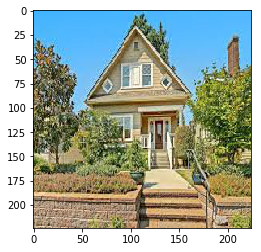

In [60]:
# Run it on some images to see the classification
some_test_images = list(paths.list_images(config.TEST_PATH))
index = 120
print(some_test_images[index])

img = image.load_img(some_test_images[index], target_size = (224,224))
orig_img = image.img_to_array(img)
img = np.expand_dims(orig_img - img_mean, axis = 0)

home_style_raw = home_model.predict(img)
print(config.CLASSES)
print(home_style_raw)
print(config.CLASSES[np.argmax(np.ravel(home_style_raw))])
plt.imshow(orig_img/255)

# Get the feature for this image
home_feature = home_feature_model.predict(img)
print(np.shape(np.ravel(home_feature)))

# Get the feature for this image
resnet_feature = resnet_feature_model.predict(img)
print(np.shape(np.ravel(resnet_feature)))